<pre><strong>US Macroeconomic Dataset 1959 Q1 - 2009 Q3</strong>

DATOS ECONOMICOS DE USA RECOGIDOS DE FORMA TRIMESTRAL DESDE 1959 A 2009

Número de observaciones - 203
Número de Variables - 14

Variables:
    year      - 1959q1 - 2009q3
    quarter   - 1-4
    realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                seasonally adjusted annual rate)
    realcons  - Real personal consumption expenditures (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realinv   - Real gross private domestic investment (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realgovt  - Real federal consumption expenditures & gross investment
                (Bil. of chained 2005 US$, seasonally adjusted annual rate)
    realdpi   - Real private disposable income (Bil. of chained 2005
                US$, seasonally adjusted annual rate)
    cpi       - End of the quarter consumer price index for all urban
                consumers: all items (1982-84 = 100, seasonally adjusted).
    m1        - End of the quarter M1 nominal money stock (Seasonally
                adjusted)
    tbilrate  - Quarterly monthly average of the monthly 3-month
                treasury bill: secondary market rate
    unemp     - Seasonally adjusted unemployment rate (%)
    pop       - End of the quarter total population: all ages incl. armed
                forces over seas
    infl      - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)
    realint   - Real interest rate (tbilrate - infl)</pre>
    


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('macrodata.csv',index_col=0,parse_dates=True)  #convierte a tipo fecha
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### Gráfico de la serie
# nos centramos en realgdp (PIB real)

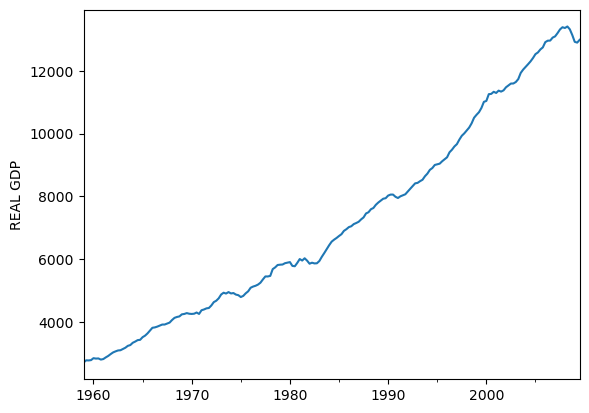

In [2]:
ax = df['realgdp'].plot()
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='REAL GDP');

# parentemente tendencia hacia arria, excepto en 2008 que hay una tendencia de bajada
# vamos a obtener la tendencia

# Descomposición aditiva

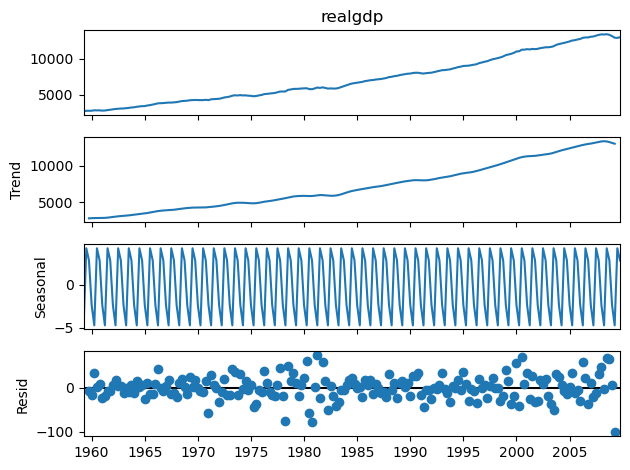

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
s_dec_additive=seasonal_decompose(df['realgdp'],model='additive', period=4)
s_dec_additive.plot()
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
s_dec_additive=seasonal_decompose(df['realgdp'], model='additive')
s_dec_additive.plot()
plt.show()

# se descompone en tendecia, estacional y residual

In [4]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

# hp filter se aplica a realgdp para separar tendencia de componente ciclico . 
# datos trimestrales lamb=1600 sino se cambiaria

#https://www.statsmodels.org/dev/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html
#The Hodrick-Prescott smoothing parameter. A value of 1600 is suggested for quarterly data. 
# Ravn and Uhlig suggest using a value of 6.25 (1600/4**4) for annual data and 129600 (1600*3**4) for monthly data.

In [5]:
df['trend'] = gdp_trend

In [6]:
df['cycle'] = gdp_cycle

In [7]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend,cycle
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085,39.511915
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468,80.088532
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545,48.875455
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067,30.591933
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333,64.882667


<Axes: >

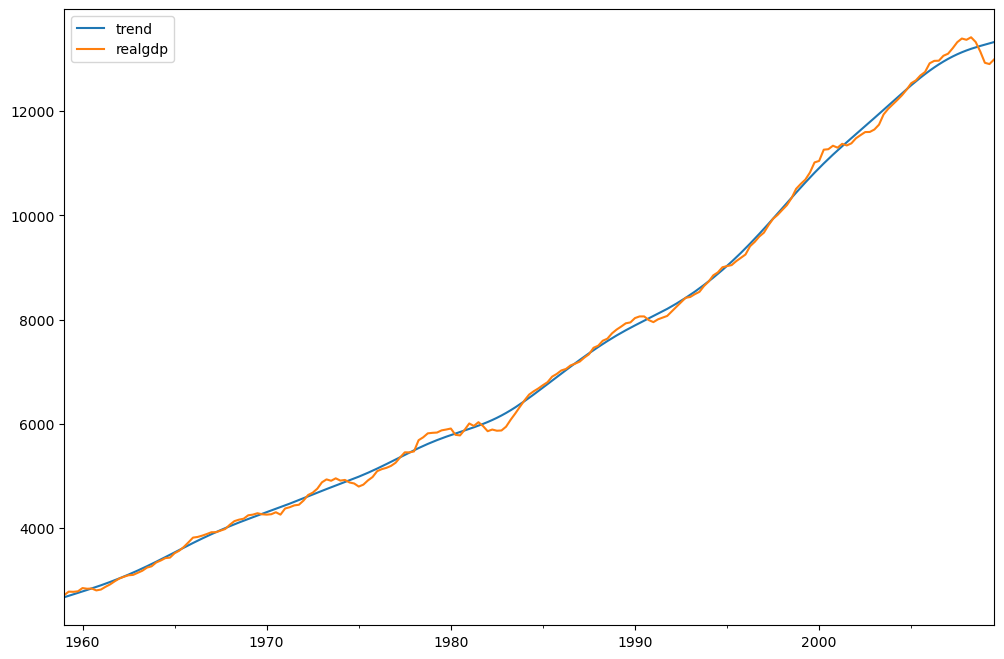

In [8]:
df[['trend','realgdp']].plot(figsize=(12,8))

<Axes: >

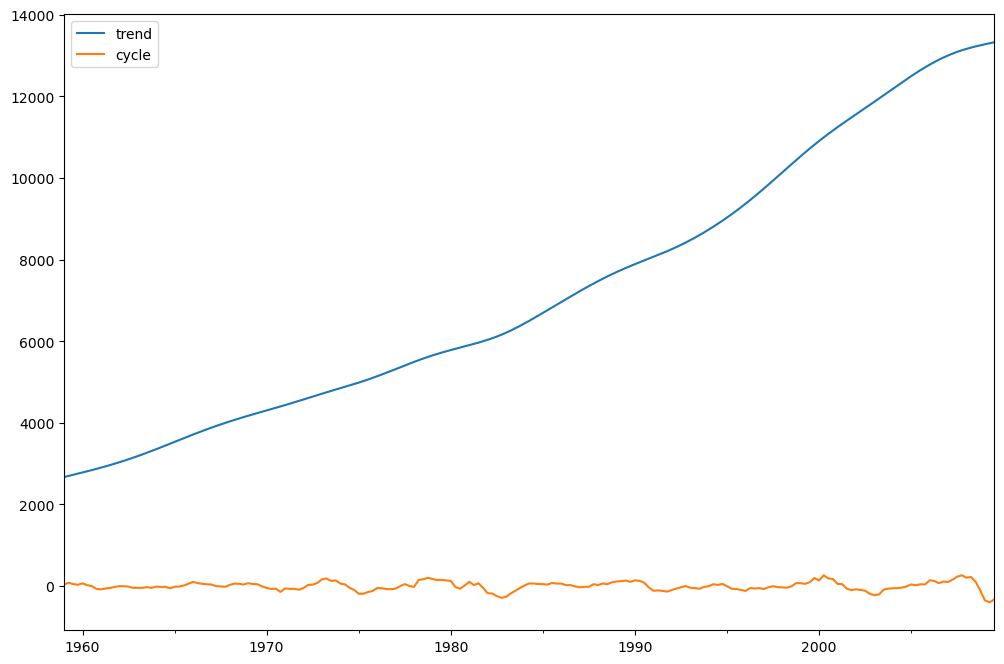

In [9]:
df[['trend','cycle']].plot(figsize=(12,8))

<Axes: >

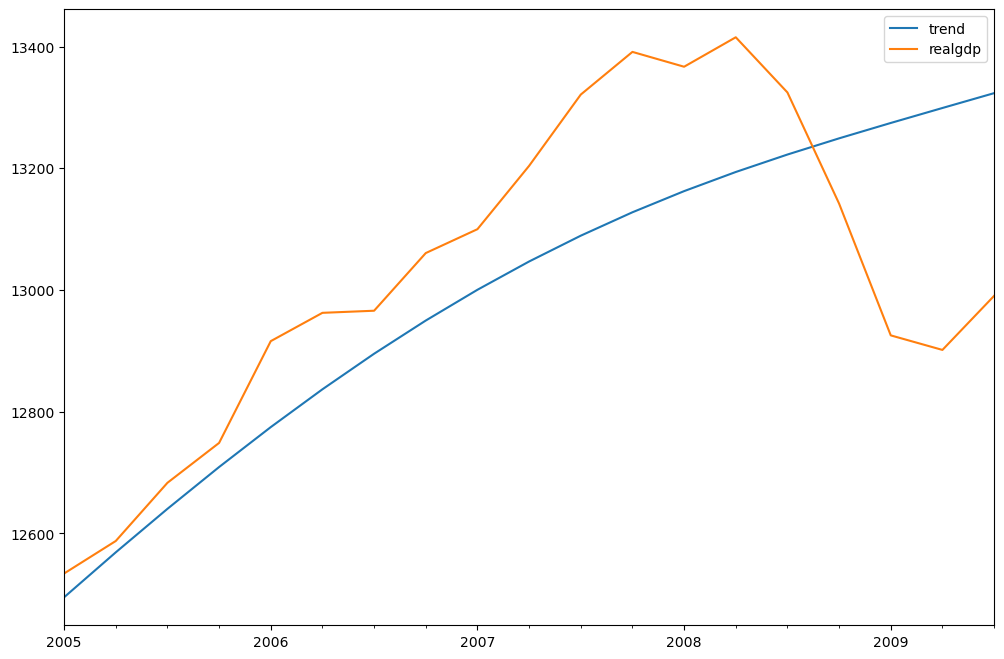

In [10]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,8))

In [11]:
# 